https://towardsdatascience.com/working-with-unbalanced-dataset-8405465630d7

In [ ]:
from sklearn.datasets import make_classification

In [2]:
X , y = make_classification( n_classes = 2 , 
                             class_sep = 1 ,
                             weights = [ 0.1 , 0.9 ] ,
                             n_informative = 2 ,
                             n_redundant = 0 ,
                             flip_y = 0 ,
                             n_features = 2 ,
                             n_clusters_per_class = 1 ,
                             n_samples = 100 ,
                             random_state = 10 )

In [10]:
from collections import Counter

In [11]:
Counter( y )

Counter({1: 90, 0: 10})

In [12]:
import matplotlib.pyplot as plt

import numpy as np

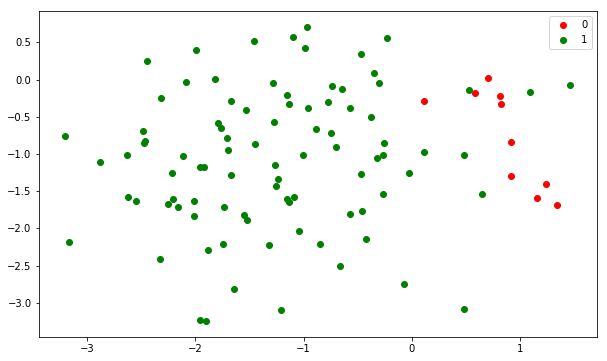

In [31]:
# couleurs des modalités de la variable cible :
label_colors = { 0 : 'red' , 1 : 'green' }

plt.figure(figsize=[10, 6])

for label in np.unique( y ):
    ndx = np.where( y == label )
    # X[ ndx ] : X(i,.) ou y(i) = label ( 0 ou 1 )
    # X[ ndx ][ : , 0 ] : 1ère colonne
    # X[ ndx ][ : , 1 ] : 2ème colonnne
    plt.scatter( X[ ndx ][ : , 0 ] ,
                 X[ ndx ][ : , 1 ] , 
                 c = label_colors[ label ] , 
                 label = label )
    
plt.legend()

In [30]:
ndx = np.where( y == 0 )

X[ ndx ][ : , 1 ]

array([-0.29021108, -0.8456969 , -1.40773826, -0.32538729, -1.68769136,
       -1.30113172, -1.58543952, -0.17606845, -0.2257862 ,  0.01405071])

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
sm = SMOTE( k_neighbors = 3 , sampling_strategy = 0.2 , random_state = 11 )

In [17]:
X_smote , y_smote = sm.fit_resample( X , y )

In [39]:
# Avant SMOTE :
X.shape

tuple

In [36]:
# Après SMOTE : les 8 dernières lignes sont les nouveaux enregistrements
X_smote.shape

(108, 2)

In [18]:
Counter( y_smote )

Counter({1: 90, 0: 18})

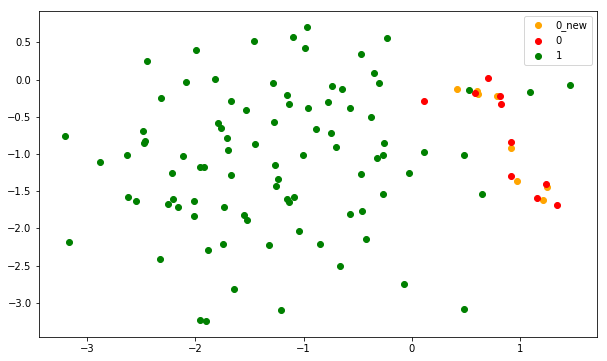

In [23]:
label_colors = { 0 : 'red' , 1 : 'green' }

plt.figure(figsize=[10, 6])

for label in np.unique( y_smote ):
    ndx = np.where( y_smote == label)
    
    if label == 0 :
        # X_smote[ ndx ][-8: , 0] : lignes 101 ... 108
        plt.scatter( X_smote[ ndx ][-8: , 0] , X_smote[ ndx ][-8: , 1] , c = 'orange' , label = '0_new' )
        # X_smote[ ndx ][:-8 , 0] : lignes 1 ... 100
        plt.scatter( X_smote[ ndx ][:-8 , 0] , X_smote[ ndx ][:-8 , 1] , c = label_colors[ label ] , label = label )
    else:
        plt.scatter(X_smote[ ndx ][: , 0] , X_smote[ ndx ][: , 1] , c = label_colors[ label ] , label = label )
plt.legend()